# YOLO_v5s Custom Dataset (2 Classes)

* https://github.com/ultralytics/yolov5

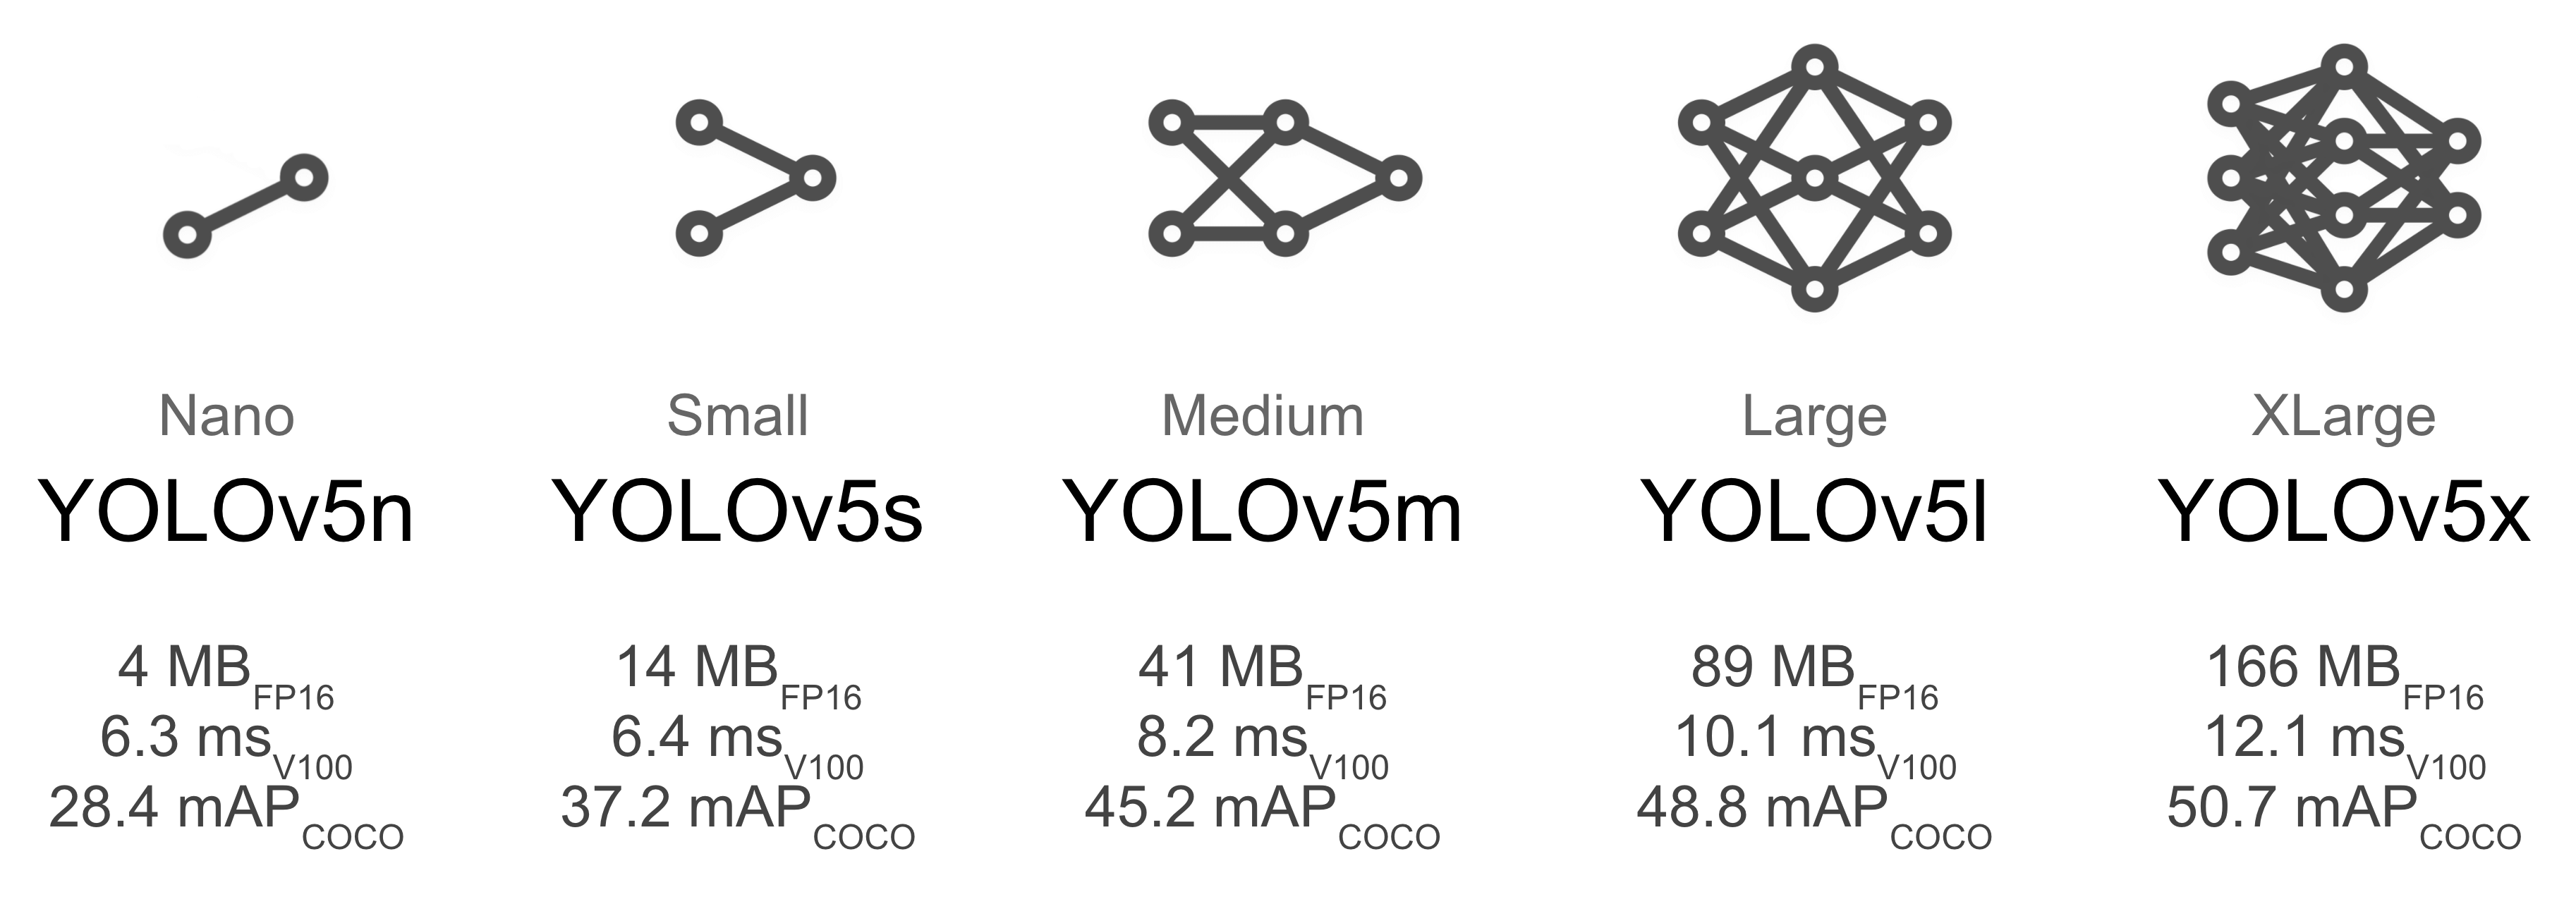

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Custom Data_Set

* 2 Classes

>## 1) wget From Github

* 'maskdataset_2C.zip' 파일 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip

--2023-07-28 12:11:42--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19667795 (19M) [application/zip]
Saving to: ‘maskdataset_2C.zip’

maskdataset_2C.zip  100%[===================>]  18.76M  --.-KB/s    in 0.08s   

2023-07-28 12:11:43 (224 MB/s) - ‘maskdataset_2C.zip’ saved [19667795/19667795]



* 현재 작업 경로

In [3]:
!pwd

/content


* 다운로드 결과 확인

In [4]:
!ls -l

total 19212
-rw-r--r-- 1 root root 19667795 Jul 28 12:11 maskdataset_2C.zip
drwxr-xr-x 1 root root     4096 Jul 26 13:33 sample_data


>## 2) Unzip

In [5]:
!unzip -q /content/maskdataset_2C.zip -d /content

# II. Train vs. Test Split

>## 1) Image Files

In [6]:
from glob import glob

img_list = glob('/content/dataset/images/*.jpg')

print(len(img_list))

100


>## 2) Label Files

In [7]:
from glob import glob

txt_list = glob('/content/dataset/images/*.txt')

print(len(txt_list))

100


>## 3) 'labels' 디렉토리 생성

In [8]:
!mkdir /content/dataset/labels

* 생성 확인

In [9]:
!ls -ld /content/dataset/labels

drwxr-xr-x 2 root root 4096 Jul 28 12:11 /content/dataset/labels


>## 4) Label Files 이동

* 'images' to 'labels' 디렉토리

In [10]:
for a in txt_list:
  !mv {a} /content/dataset/labels

* 실행 확인

In [11]:
from glob import glob

img_list = glob('/content/dataset/images/*.jpg')
txt_list = glob('/content/dataset/labels/*.txt')

print(len(img_list))
print(len(txt_list))

100
100


>## 5) train_test_split( )

* 8:2

In [12]:
from sklearn.model_selection import train_test_split

train_img_list, valid_img_list = train_test_split(img_list,
                                                test_size = 0.2,
                                                random_state = 2045)

print(len(train_img_list), len(valid_img_list))

80 20


* 목록 확인

In [13]:
print('Train_Img: ', train_img_list)
print('Valid_Img: ', valid_img_list)

Train_Img:  ['/content/dataset/images/images33.jpg', '/content/dataset/images/merlin_168147336_bd400ea4-2e50-4b87-90dc-8eb885e5d7be-master1050.jpg', '/content/dataset/images/maxresdefault2.jpg', '/content/dataset/images/maxresdefault4.jpg', '/content/dataset/images/kljlhk.jpg', '/content/dataset/images/kolkata1.jpg', '/content/dataset/images/kGf6-hnvukfe8013164.jpg', '/content/dataset/images/Nose_exposed_N95_grande.jpg', '/content/dataset/images/jthomas201909170039750xx4000-2250-0-209.jpg', '/content/dataset/images/maxresdefault3.jpg', '/content/dataset/images/LYNXMPEG102IV_L.jpg', '/content/dataset/images/merlin_168765846_a430c80e-b84d-4ee4-a65e-4adda3f1e353-master1050.jpg', '/content/dataset/images/images43.jpg', '/content/dataset/images/images36.jpg', '/content/dataset/images/mfile_1505703_1_L_20200130190326.jpg', '/content/dataset/images/msgsgsg.jpg', '/content/dataset/images/Model-with-White-face-mask-with-red-X-2.jpg', '/content/dataset/images/images25.jpg', '/content/dataset/ima

>## 6) Train.txt & Valid.txt 생성

In [14]:
with open('/content/dataset/Train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/Valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

* 생성 확인

In [15]:
!ls -l /content/dataset/*.txt

-rw-r--r-- 1 root root 4298 Jul 28 12:11 /content/dataset/Train.txt
-rw-r--r-- 1 root root  972 Jul 28 12:11 /content/dataset/Valid.txt


>## 7) data.yaml 생성

In [16]:
yaml_text = """train: /content/dataset/Train.txt
val: /content/dataset/Valid.txt

nc: 2
names: ['without_mask', 'with_mask']"""

with open('/content/dataset/data.yaml', 'w') as file:
    file.write(yaml_text)

* 생성 확인

In [17]:
!cat /content/dataset/data.yaml

train: /content/dataset/Train.txt
val: /content/dataset/Valid.txt

nc: 2
names: ['without_mask', 'with_mask']

# III. Yolov5 Configuration

>## 1) Yolo_v5 Clone

In [18]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15829, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 15829 (delta 21), reused 31 (delta 10), pack-reused 15768
Receiving objects: 100% (15829/15829), 14.65 MiB | 3.29 MiB/s, done.
Resolving deltas: 100% (10833/10833), done.


* 작업 경로 설정

In [19]:
%cd yolov5

/content/yolov5


>## 2) Install Dependencies

In [20]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


>## 3) Configuration Check

In [21]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


# IV. Model Learning

* 현재 작업 경로

In [22]:
!pwd

/content/yolov5


>## 1) YOLO_v5m

* yolov5s.pt
 - 약 25분

In [23]:
%%time

!python train.py --img 640 --batch 16 --epochs 200 --weights yolov5m.pt --data /content/dataset/data.yaml --name mask_yolov5_results

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5m.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_yolov5_results, exist_ok=False, quad=False, cos_lr=False, label_smoothi

> ## 2) Object Detection 결과 확인

>### (1) Loss & mAP

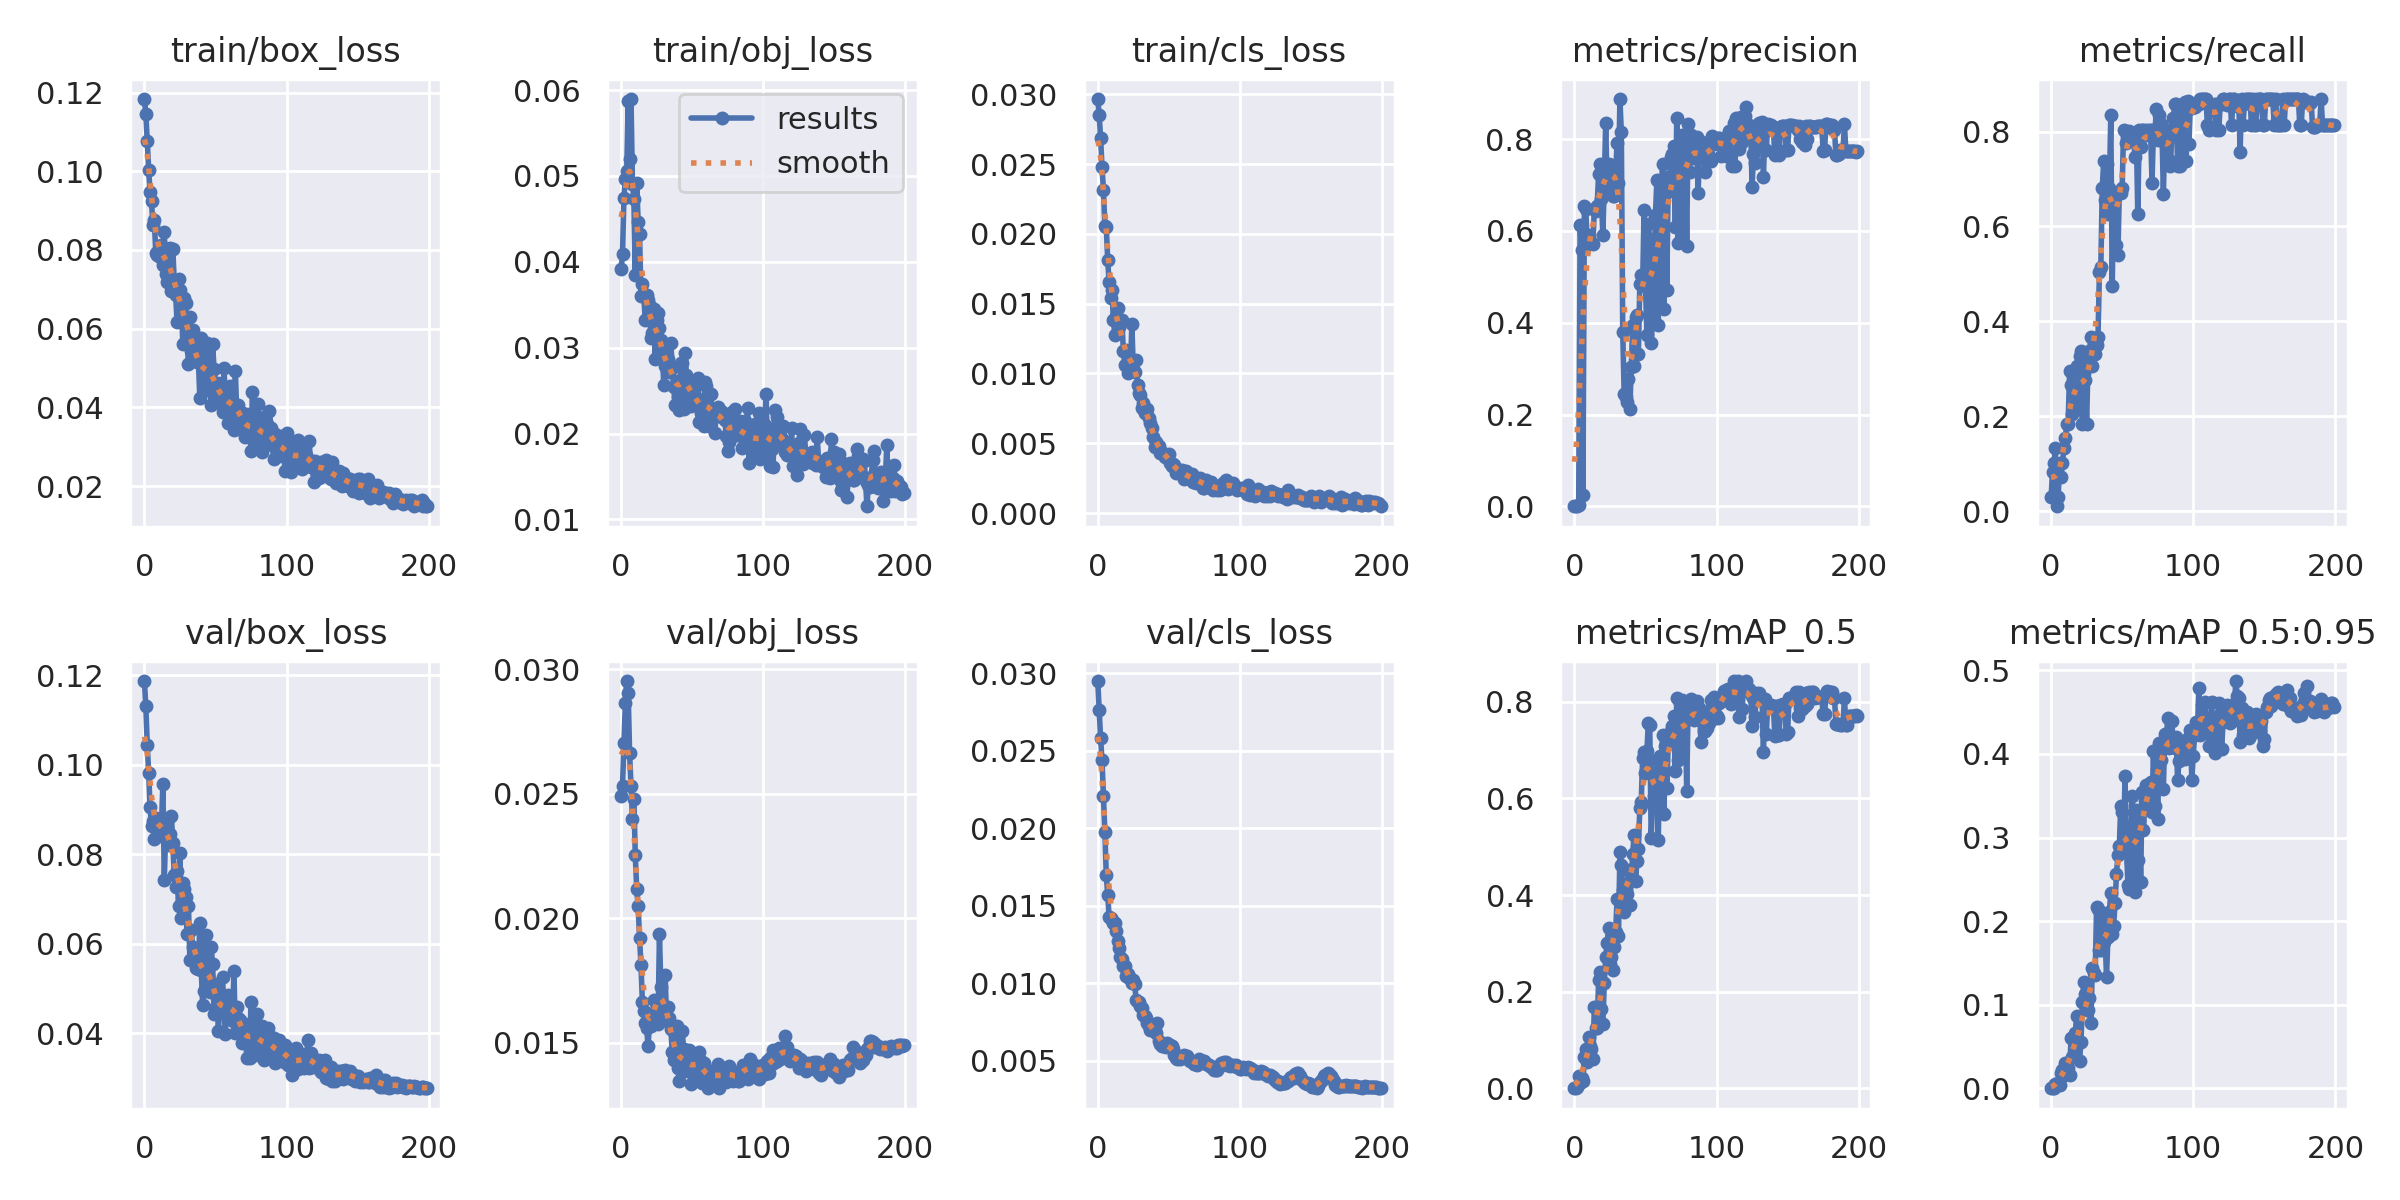

In [24]:
from IPython.display import Image

Image('/content/yolov5/runs/train/mask_yolov5_results/results.png')

>### (2) Training Results Visualization

In [25]:
import matplotlib.pyplot as plt

img = plt.imread('/content/yolov5/runs/train/mask_yolov5_results/train_batch0.jpg')

plt.figure(figsize = (20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# V. Model Validation

* 현재 작업 경로

In [26]:
!pwd

/content/yolov5


>## 1) Validation 데이터에 best.pt 적용

In [27]:
!python val.py --data /content/dataset/data.yaml --weights /content/yolov5/runs/train/mask_yolov5_results/weights/best.pt --exist-ok

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

val: data=/content/dataset/data.yaml, weights=['/content/yolov5/runs/train/mask_yolov5_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-196-gacdf73b Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla 

# VI. Model Test

>## 1) Test Directory
 * --source /content/dataset/test

In [28]:
!python detect.py --source /content/dataset/test --weight /content/yolov5/runs/train/mask_yolov5_results/weights/best.pt --conf 0.5 --name Mask_Test --exist-ok --line-thickness 1

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/content/yolov5/runs/train/mask_yolov5_results/weights/best.pt'], source=/content/dataset/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=Mask_Test, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=F

>## 2) Results Visualization

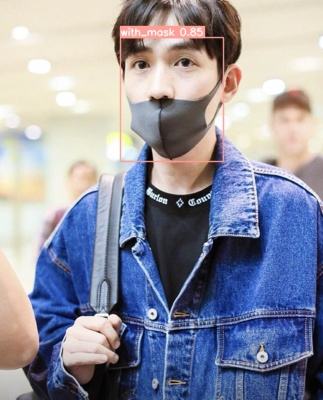

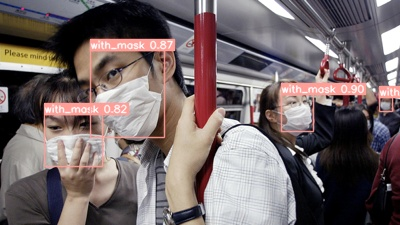

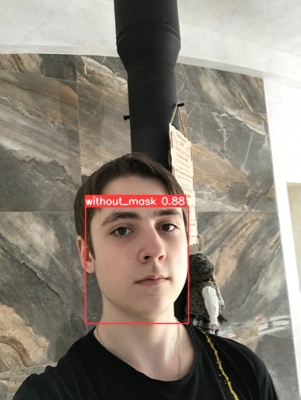

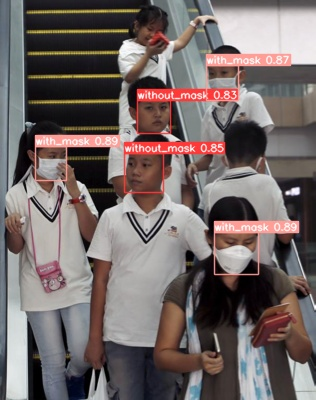

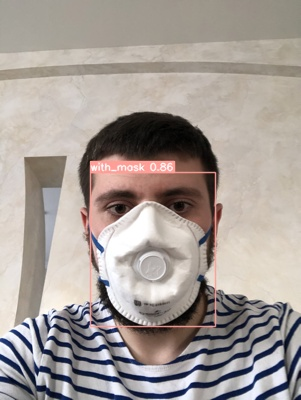

In [29]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/Mask_Test/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# VII. Save Model to Google Drive

>## 1) Mount Google Drive

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

>## 2) Model Copy to Google Drive

In [31]:
# cp -r /content/yolov5/runs/train/mask_yolov5_results /content/drive/MyDrive/Mask_yolov5

#
#
#
# End Of Document
#
#
#